In [ ]:
"""
Make summary figures for SLiM simulation analyses, including Fig. 2, Fig. S3, Fig. S6, Fig. S8, Fig. S10

Inputs
------
- ./data/Allele_spectrum.pkl
    A dict mapping model name -> mean cumulative AF spectrum.
- ./data/SLiM_summary_raw_v2.csv
    Raw counts for beneficial/neutral/deleterious substitutions/polymorphisms
- ./data/Simulation_summary_v2.csv
    Replicate-normalized fractions of beneficial/neutral/deleterious substitutions/polymorphisms
    and dN/d_neutral, pN/p_neutral.
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Model name lists
nonquasi_list = ['Pseudo', 'Neutral', 'Adaptive', 'Neutral_dom', 'Adaptive_dom', 'quasi_stablespace20']
quasi_list = [
    'quasi_dom', 
    'quasi_env2', 'quasi_env5', 'quasi_env10', 'quasi_env20', 
    'quasi_int2', 'quasi_int25', 'quasi_int100', 'quasi_int200', 
    'quasi_pop500', 'quasi_pop1000', 'quasi_pop5000', 'quasi_pop10000', 'quasi_pop50000', 
    'quasi_neufrac0.05', 'quasi_neufrac0.15', 'quasi_neufrac0.2', 'quasi_neufrac0.25', 
    'quasi_lambda2', 'quasi_lambda4', 'quasi_lambda6', 'quasi_lambda8', 'quasi_lambda10', 
    'quasi_AP0.15', 'quasi_AP0.35', 'quasi_AP0.45', 'quasi_AP0.5',
    
]

In [4]:
# Set matplotlib style
rcParams_dict = {
    'xtick.bottom': True, 
    'axes.spines.top': False, 
    'axes.spines.bottom': True, 
    'axes.spines.right': False, 
    'patch.edgecolor':'k', 
    'patch.force_edgecolor': True, 
    'font.size': 15, 
    'pdf.fonttype':42, 
    'font.family':'Arial', 
    'mathtext.fontset':'custom', 
    'mathtext.default': 'regular', 
    'mathtext.it': 'Arial:italic', 
    'mathtext.it': 'Arial:italic', 
}
mpl.rcParams.update(rcParams_dict)

# Color presets
color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'tan', 'C8', 'C9', 'yellow', 'lime']
color_list2 = ['dimgrey', 'white', 'lightgrey']
mut_type_list = ['Beneficial', 'Neutral', 'Deleterious']

# Boxplot “flier” (outlier) style
flierprops = dict(marker='.', markerfacecolor='black', markersize=2, 
                  linestyle='none')

In [6]:
# Load precomputed inputs
with open('./data/Allele_spectrum.pkl', 'rb') as file:
    spectrum_final_dict = pkl.load(file)

summary_df = pd.read_csv('./data/SLiM_summary_raw.csv')
plt_df = pd.read_csv('./data/Simulation_summary.csv')

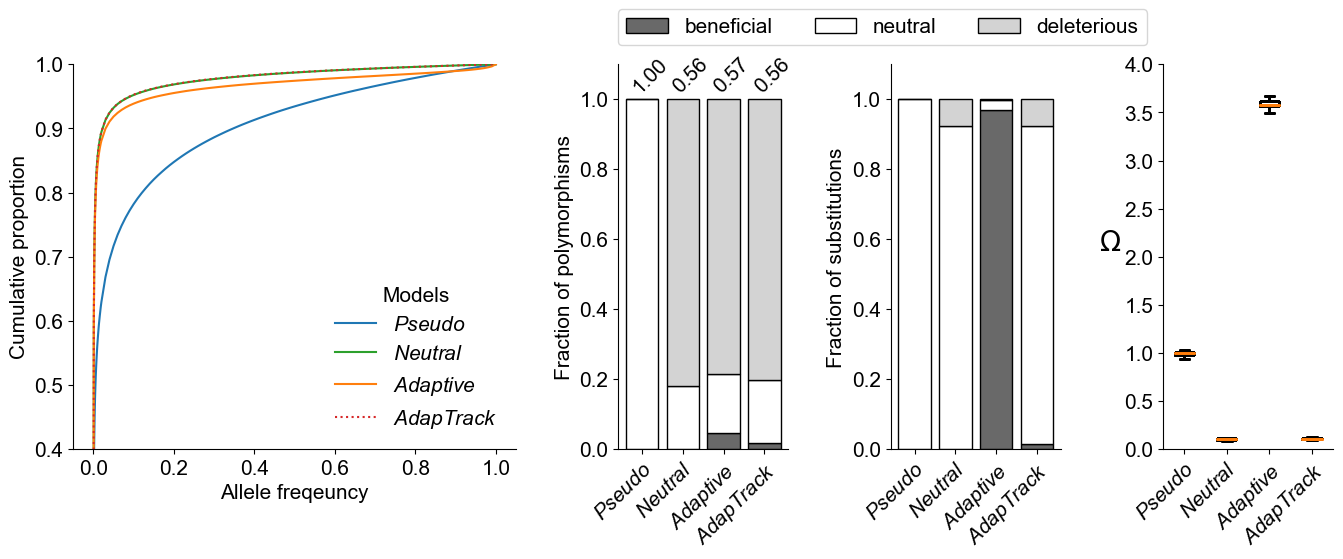

In [7]:
# Figure 2 a-d: Pseudo/Neutral/Adaptive vs AdaptTrack (quasi_pop10000)

line_type_dict = {
    'Pseudo':'-', 
    'Neutral':'-', 
    'Adaptive':'-', 
    'quasi_pop10000':':'
}
color_list = ['C0', 'C2', 'C1', 'C3'] # order aligned to the four plotted models

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])

mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\it{Pseudo}$', '$\it{Neutral}$', '$\it{Adaptive}$', '$\it{AdapTrack}$']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for k, version in enumerate(['Pseudo', 'Neutral', 'Adaptive', 'quasi_pop10000']):
    # Prepend zero so the cumcurve starts at (0, 0)
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), 
             ls=line_type_dict[version], label=type_list[k], color=color_list[k])
ax1.legend(title='Models', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.4, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (Neutral).
for idx, i in enumerate([0, 1, 2, 18]): # correspond to 'Pseudo', 'Neutral', 'Adaptive', 'quasi_pop10000'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )
    
    # Calculate relative ratio to the reference model (Neutral)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[0, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.2, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[np.array([0, 1, 2, 3]), [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops
    )
    
# Formatting
ax4.set_xticks([1, 2, 3, 4])
ax4.set_ylim(0, 4)
ax4.set_xlim(0.5, 4.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'./Figures/Fig2a-d.pdf', bbox_inches='tight')

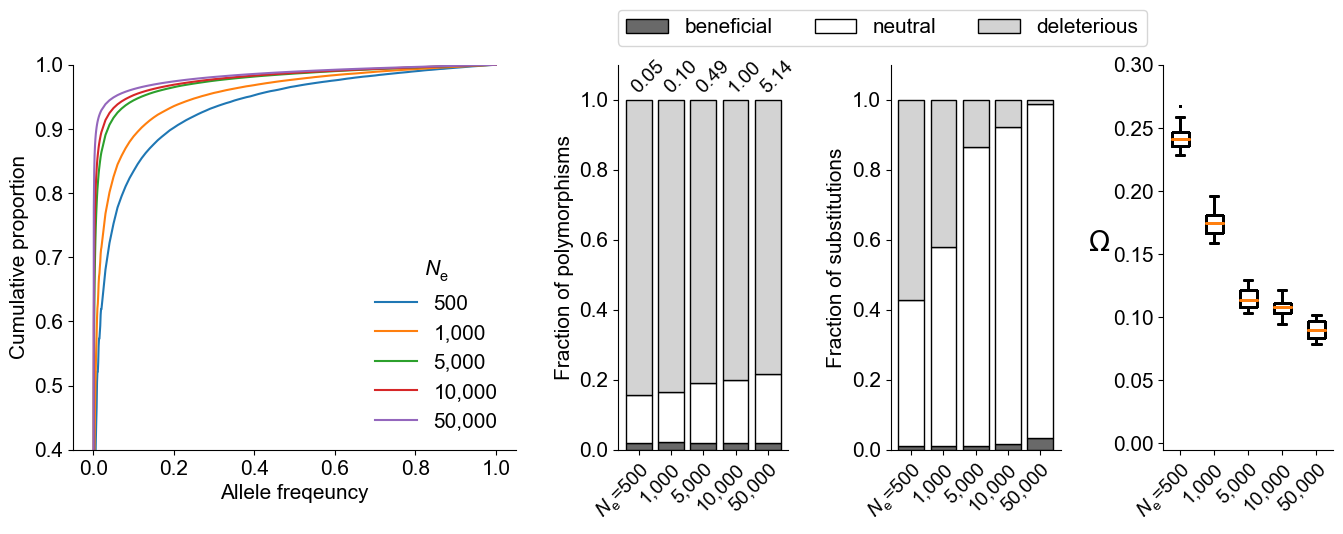

In [8]:
# Figure 2 e-h: Pseudo/Neutral/Adaptive vs AdaptTrack (quasi_pop10000)

label_dict = {
    'quasi_pop500':'500', 
    'quasi_pop1000':'1,000', 
    'quasi_pop5000':'5,000', 
    'quasi_pop10000':'10,000', 
    'quasi_pop50000':'50,000'
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])

mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{N}_e$=500', '1,000', '5,000', '10,000', '50,000']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_pop500', 'quasi_pop1000', 'quasi_pop5000', 'quasi_pop10000', 'quasi_pop50000']:
     # Prepend zero so the cumcurve starts at (0, 0)
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), 
             label=label_dict[version])
ax1.legend(title='$\mathit{N}_e$', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.4, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([15, 16, 17, 18, 19]):
    # correspond to 'quasi_pop500', 'quasi_pop1000', 'quasi_pop5000', 'quasi_pop10000', 'quasi_pop50000'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.3, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=14
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(
    type_list, rotation = 45, size=14, 
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(
    type_list, rotation = 45, size=14, 
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[15, 16, 17, 18, 19], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops=flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5])
ax4.set_ylim(-0.005, 0.3)
ax4.set_xlim(0.5, 5.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=14)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'./Figures/Fig2e-h.pdf', bbox_inches='tight')

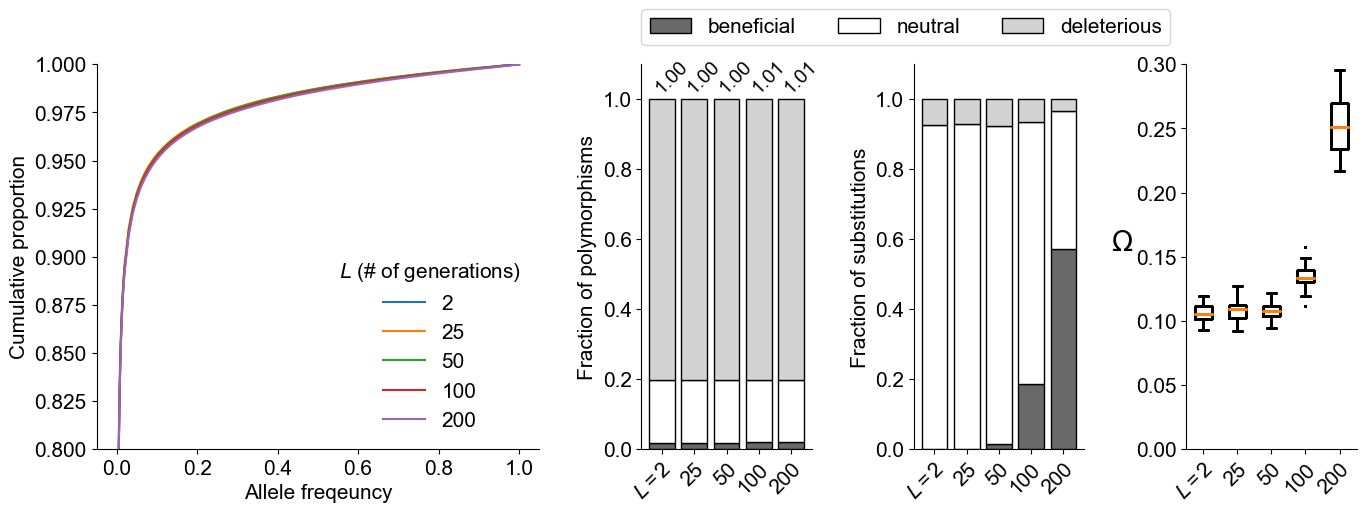

In [9]:
# Figure 2 i-l: varying environment intervals
# On average change every 2, 25, 50, 100, 200 generations.

label_dict = {
    'quasi_int2':'2', 
    'quasi_int25':'25', 
    'quasi_pop10000':'50', 
    'quasi_int100':'100', 
    'quasi_int200':'200'
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2], )
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{L}=2$', '25', '50', '100', '200']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_int2', 'quasi_int25', 'quasi_pop10000', 'quasi_int100', 'quasi_int200']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='$\mathit{L}$ (# of generations)', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([11, 12, 18, 13, 14]):
    # correspond to 'quasi_int2', 'quasi_int25', 'quasi_pop10000', 'quasi_int100', 'quasi_int200'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (Neutral)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.3, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=14
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[11, 12, 18, 13, 14], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5])
ax4.set_ylim(0, 0.3)
ax4.set_xlim(0.5, 5.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'./Figures/Fig2i-l.pdf', bbox_inches='tight')

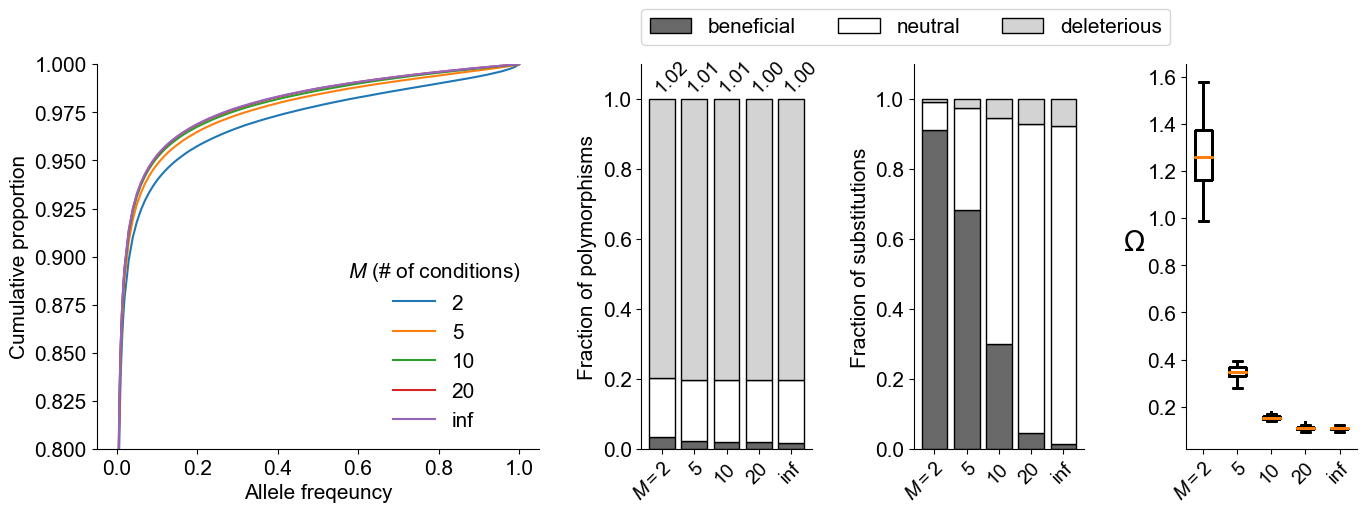

In [10]:
# Figure 2 m-p: 
# Varying number of environments: 2, 5, 10, 20, infinite

label_dict = {
    'quasi_env2':'2', 
    'quasi_env5':'5', 
    'quasi_env10':'10', 
    'quasi_env20':'20', 
    'quasi_pop10000':'inf'
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{M}=2$', '5', '10', '20', 'inf']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_env2', 'quasi_env5', 'quasi_env10', 'quasi_env20', 'quasi_pop10000']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='$\mathit{M}$ (# of conditions)', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([7, 8, 9, 10, 18]):
    # correspond to 'quasi_env2', 'quasi_env5', 'quasi_env10', 'quasi_env20', 'quasi_pop10000'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )
    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.3, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=14
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=14)
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=14)
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[7, 8, 9, 10, 18], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5])
ax4.set_xlim(0.5, 5.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=14)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'./Figures/Fig2m-p.pdf', bbox_inches='tight')

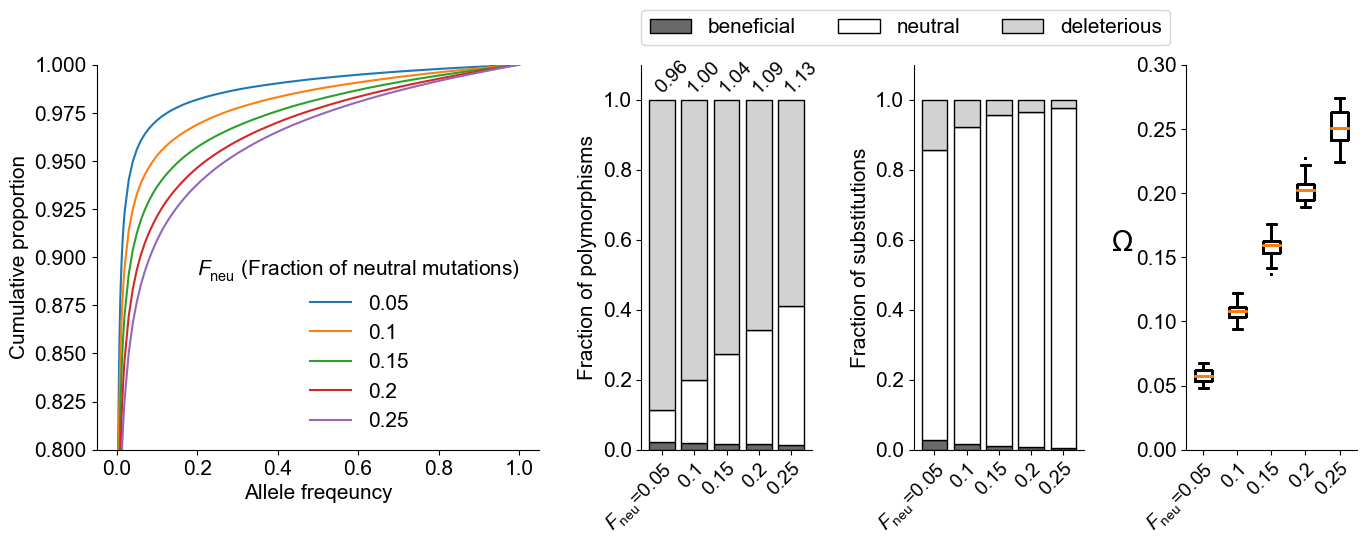

In [11]:
# Figure S3 e-h
# Varying fractions of neutral mutations: 0.05, 0.1, 0.15, 0.2, 0.25

label_dict = {
    'quasi_neufrac0.05':'0.05', 
    'quasi_pop10000':'0.1', 
    'quasi_neufrac0.15':'0.15', 
    'quasi_neufrac0.2':'0.2', 
    'quasi_neufrac0.25':'0.25', 
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{F}_{neu}$=0.05', '0.1', '0.15', '0.2', '0.25']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_neufrac0.05', 'quasi_pop10000', 'quasi_neufrac0.15', 'quasi_neufrac0.2', 'quasi_neufrac0.25']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='$\mathit{F}_{neu}$ (Fraction of neutral mutations)', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([20, 18, 21, 22, 23]):
    # correspond to 'quasi_neufrac0.05', 'quasi_pop10000', 'quasi_neufrac0.15', 'quasi_neufrac0.2', 'quasi_neufrac0.25'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )
        
    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.3, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, fontsize=14
    )
    
# Formatting
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', fontsize=14)
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', fontsize=14)
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[20, 18, 21, 22, 23], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5])
ax4.set_ylim(0, 0.3)
ax4.set_xlim(0.5, 5.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', fontsize=14)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'./Figures/FigS3e-h.pdf', bbox_inches='tight')

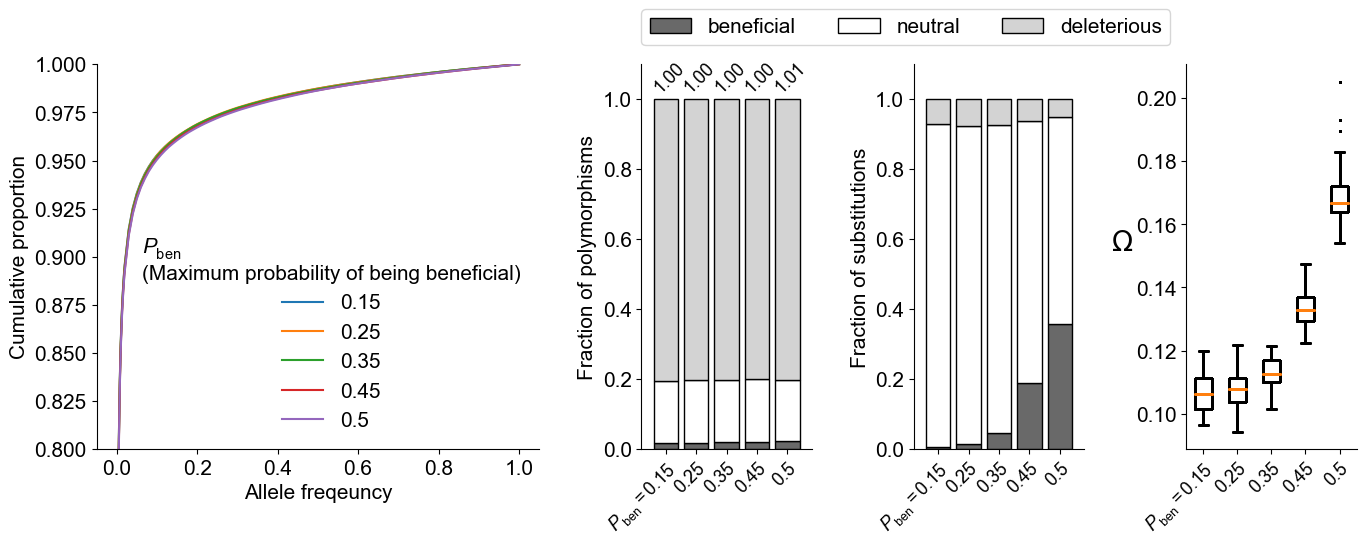

In [13]:
# Figure S3 i-l
# Varying Maximum probability of being beneficial: Pben = 0.15, 0.25, 0.35, 0.45, 0.5

meanORinst = 'inst'
label_dict = {
    'quasi_AP0.15':'0.15', 
    'quasi_pop10000':'0.25', 
    'quasi_AP0.35':'0.35', 
    'quasi_AP0.45':'0.45', 
    'quasi_AP0.5':'0.5', 
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{P}_{ben}=0.15$', '0.25', '0.35', '0.45', '0.5']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_AP0.15', 'quasi_pop10000', 'quasi_AP0.35', 'quasi_AP0.45', 'quasi_AP0.5']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='$\mathit{P}_{ben}$ \n(Maximum probability of being beneficial)', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([29, 18, 30, 31, 32]):
    # correspond to 'quasi_AP0.15', 'quasi_pop10000', 'quasi_AP0.35', 'quasi_AP0.45', 'quasi_AP0.5'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )
        
    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.1, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=13
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)
ax2.set_xlim(-0.8, 4.8)

ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)
ax3.set_xlim(-0.8, 4.8)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[29, 18, 30, 31, 32], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        widths=0.5, flierprops=flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5])
ax4.set_xlim(0.5, 5.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'Figures/FigS3i-l.pdf', bbox_inches='tight')

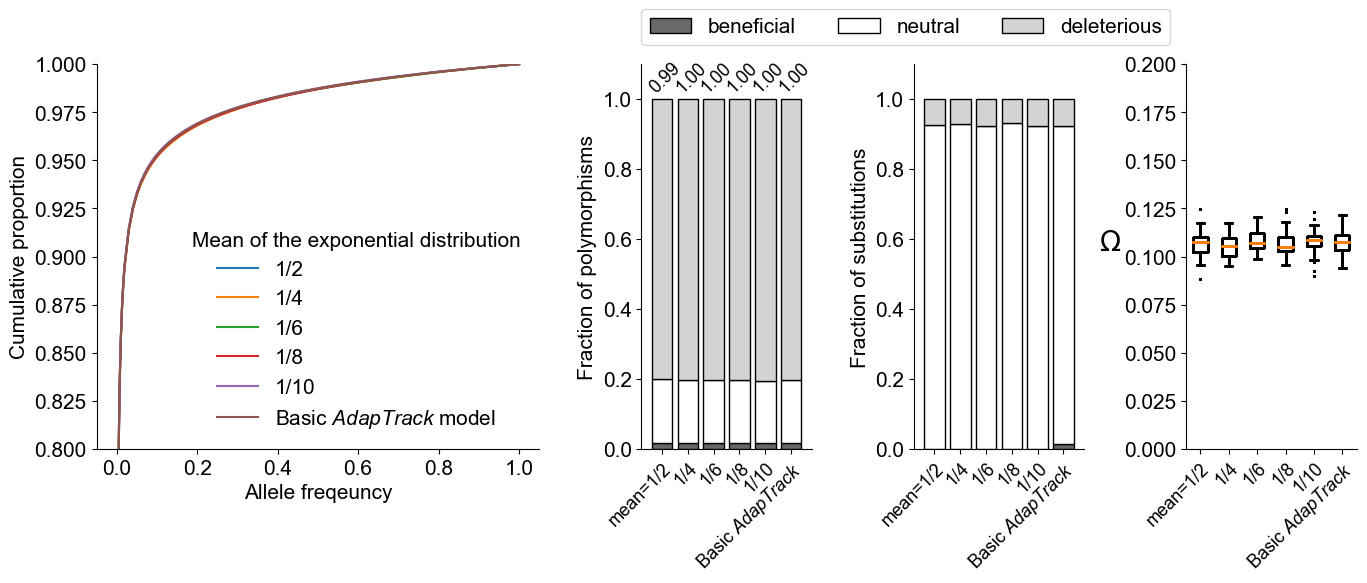

In [14]:
# Figure S3 m-p.
# Magnitude of an environmental change that occurs every generation follows an exponential distribution
# Varying mean of the exponential distribution: 1/2, 1/4, 1/6, 1/8, 1/10

label_dict = {
    'quasi_lambda2':'1/2', 
    'quasi_lambda4':'1/4', 
    'quasi_lambda6':'1/6', 
    'quasi_lambda8':'1/8', 
    'quasi_lambda10':'1/10', 
    'quasi_pop10000':'Basic $\mathit{AdapTrack}$ model', 
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['mean=1/2', '1/4', '1/6', '1/8', '1/10', 'Basic $\mathit{AdapTrack}$']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_lambda2', 'quasi_lambda4', 'quasi_lambda6', 
                'quasi_lambda8', 'quasi_lambda10', 'quasi_pop10000']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='Mean of the exponential distribution', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([24, 25, 26, 27, 28, 18]):
    # correspond to 'quasi_lambda2', 'quasi_lambda4', 'quasi_lambda6', 'quasi_lambda8', 'quasi_lambda10', 'quasi_pop10000'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.1, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=13
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4, 5])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)
ax2.set_xlim(-0.8, 5.8)

ax3.set_xticks([0, 1, 2, 3, 4, 5])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)
ax3.set_xlim(-0.8, 5.8)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[24, 25, 26, 27, 28, 18], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, widths=0.5, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5, 6])
ax4.set_ylim(0, 0.2)
ax4.set_xlim(0.5, 6.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'Figures/FigS3m-o.pdf', bbox_inches='tight')

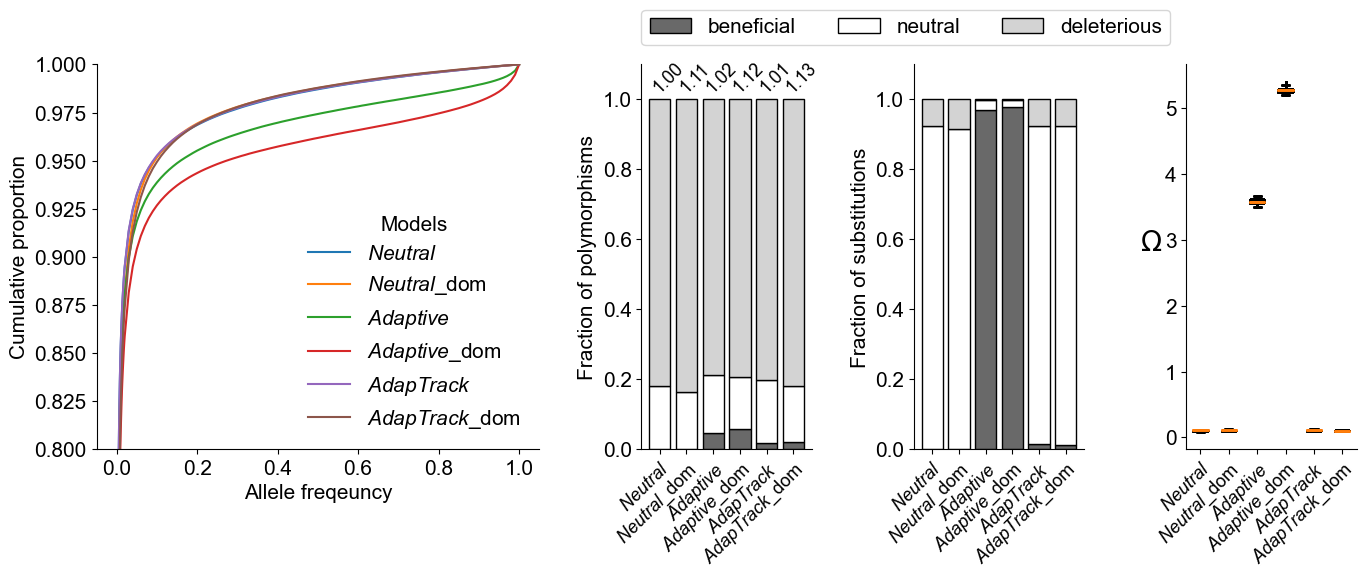

In [16]:
# Figure S3 q-t
# Varying dominance. 
# With dominance (indicated by “dom”) the coefficient of dominance of a mutation in an environment is h = 0.75 
# if the mutation is beneficial in the environment, 0.50 if the mutation is neutral, and 0.25 if the mutation 
# is deleterious. Without dominance, h = 0.50 regardless of the mutational fitness effect. 

label_dict = {
    'Neutral':'$\mathit{Neutral}$', 
    'Neutral_dom':'$\mathit{Neutral}$_dom', 
    'Adaptive':'$\mathit{Adaptive}$', 
    'Adaptive_dom':'$\mathit{Adaptive}$_dom', 
    'quasi_pop10000':'$\mathit{AdapTrack}$', 
    'quasi_dom':'$\mathit{AdapTrack}$_dom'
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\mathit{Neutral}$', '$\mathit{Neutral}$_dom', '$\mathit{Adaptive}$', 
             '$\mathit{Adaptive}$_dom', '$\mathit{AdapTrack}$', '$\mathit{AdapTrack}$_dom']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['Neutral', 'Neutral_dom', 'Adaptive', 'Adaptive_dom', 'quasi_pop10000', 'quasi_dom']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='Models', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([1, 3, 2, 4, 18, 6]):
    # correspond to 'Neutral', 'Neutral_dom', 'Adaptive', 'Adaptive_dom', 'quasi_pop10000', 'quasi_dom'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[1, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.3, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45, size=13
    )

# Formatting
ax2.set_xticks([0, 1, 2, 3, 4, 5])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks([0, 1, 2, 3, 4, 5])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[1, 3, 2, 4, 18, 6], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2, 3, 4, 5, 6])
#ax4.set_ylim(0.05, 0.15)
ax4.set_xlim(0.5, 6.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor', size=13)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'Figures/FigS3q-t.pdf', bbox_inches='tight')

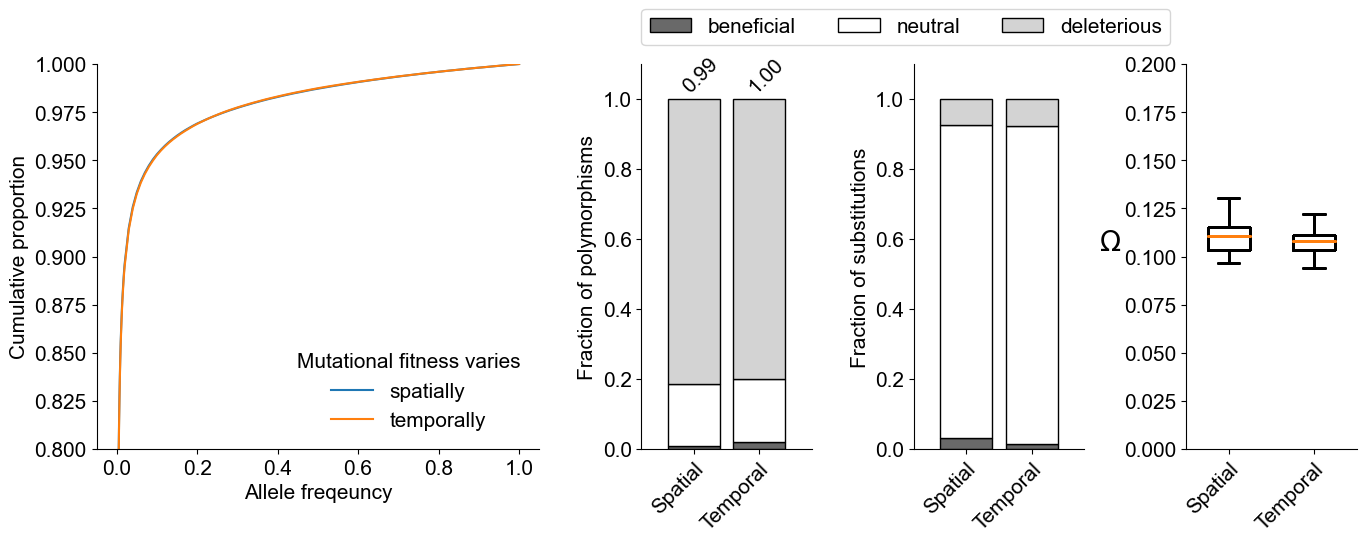

In [17]:
# Figure S10
# Consider spatial heterogeneity

label_dict = {
    'quasi_stablespace20':'spatially', 
    'quasi_pop10000':'temporally'
}

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4])
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['Spatial', 'Temporal']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for version in ['quasi_stablespace20', 'quasi_pop10000']:
    ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), alpha=1, 
             label=label_dict[version])
ax1.legend(title='Mutational fitness varies', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.8, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (quasi_pop10000).
for idx, i in enumerate([5, 18]):
    for j, mut_type in enumerate(mut_type_list):
        # correspond to 'quasi_stablespace20', 'quasi_pop10000'
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (quasi_pop10000)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[18, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.1, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45
    )

# Formatting
ax2.set_xticks([0, 1])
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)
ax2.set_xlim(-0.8, 1.8)

ax3.set_xticks([0, 1])
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)
ax3.set_xlim(-0.8, 1.8)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[5, 18], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, widths=0.5, 
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks([1, 2])
ax4.set_ylim(0, 0.2)
ax4.set_xlim(0.5, 2.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
#ax4.set_ylabel('$\mathit{d}_{N}/\mathit{d}_{neutral}$', fontsize=15)
ax4.set_ylabel('$\mathit{\Omega}$', labelpad=10, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'../Figures/FigS10.pdf', bbox_inches='tight')

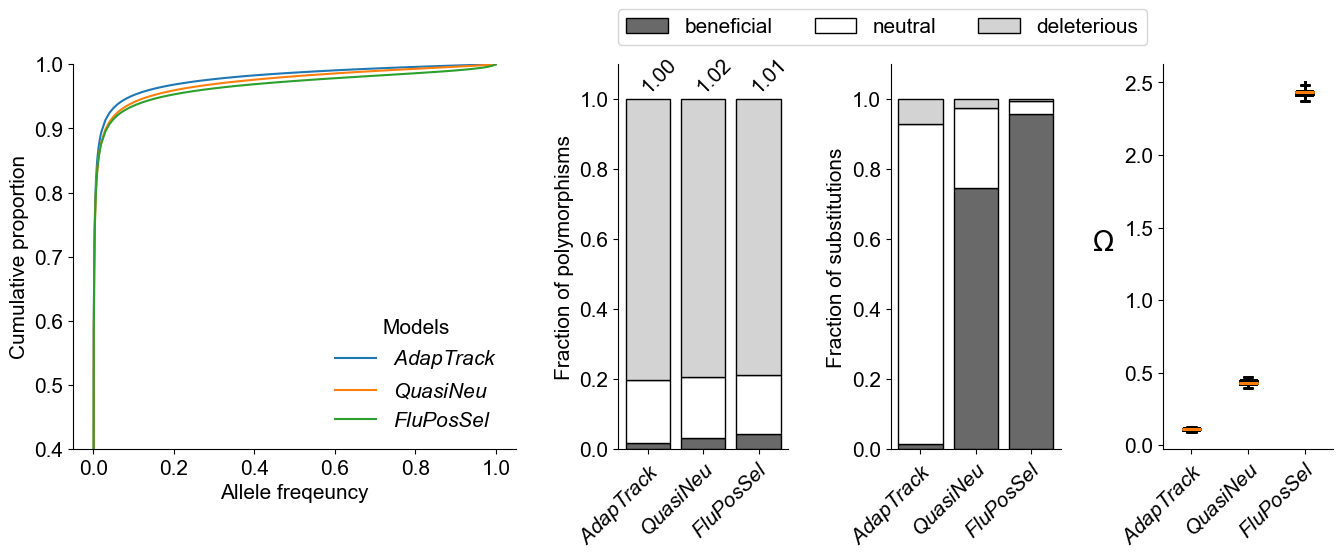

In [21]:
# Figure S8
# Consider different mode of fluctuating selection: adaptive tracking, quasi neutral, fluctuating positive selection

version_list = ['AdapTrack', 'AdapTrack_quasineu', 'AdapTrack_adapt_fluc']

line_type_dict = {
    'AdapTrack':'-', 
    'AdapTrack_quasineu':'-', 
    'AdapTrack_adapt_fluc':'-', 
}
color_list = ['C0', 'C1', 'C2']

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w', figsize=[18, 5])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75, 
                      hspace=0.1, wspace=0.6, )
ax1 = fig.add_subplot(gs[0, 0:2], )
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4], )
mut_type_list = ['beneficial', 'neutral', 'deleterious']
type_list = ['$\it{AdapTrack}$', '$\it{QuasiNeu}$', '$\it{FluPosSel}$', ]

# Draw AF spectra
x_list = np.concatenate((np.linspace(0, 0.02, 21), np.linspace(0.03, 1, 98)))
for k, version in enumerate(version_list):
    if 'asexual' in version:
        ax1.plot(x_list[0:69], [0]+spectrum_final_dict[version][0:68].tolist(), 
                 ls=line_type_dict[version], label=type_list[k], color=color_list[k])
    else:
        ax1.plot(x_list, [0]+spectrum_final_dict[version][0:].tolist(), 
                 ls=line_type_dict[version], label=type_list[k], color=color_list[k])
ax1.legend(title='Models', framealpha=0)
ax1.set_xlabel('Allele freqeuncy', fontsize=15)
ax1.set_ylabel('Cumulative proportion', fontsize=15)
ax1.set_ylim(0.4, 1)

# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (AdapTrack).
for idx, i in enumerate([33, 34, 35]):
    # correspond to 'AdapTrack', 'AdapTrack_quasineu', 'AdapTrack_adapt_fluc'
    for j, mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_P'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(), 
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i, f'{mut_type}_{meanORinst}_S'], 
            bottom=plt_df.loc[i, [f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(), 
            color=color_list2[j]
        )
        
    # Calculate relative ratio to the reference model (AdapTrack)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[33, [f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.2, y=1.02, ha='center', 
        s=f'{ratio_P:.2f}', rotation=45
    )

# Formatting
ax2.set_xticks(range(len(version_list)))
ax2.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0, 1.05], ncol=3)
ax2.set_ylim(0, 1.1)

ax3.set_xticks(range(len(version_list)))
ax3.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_ylim(0, 1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1, 31):
    ax4.boxplot(
        plt_df.loc[[33, 34, 35], [f'dNdneutral_{rep}' for rep in range(1, 31)]].to_numpy().T, 
        flierprops = flierprops, 
    )

# Formatting
ax4.set_xticks(range(1, 1+len(version_list)))
ax4.set_xlim(0.5, 3.5)
ax4.set_xticklabels(
    type_list, rotation = 45, 
    ha='right', rotation_mode='anchor')
ax4.set_ylabel('$\mathit{Ω}$', labelpad=15, fontsize=20, rotation=0)

plt.tight_layout()
#plt.savefig(f'../Figures/FigS8.pdf', bbox_inches='tight')

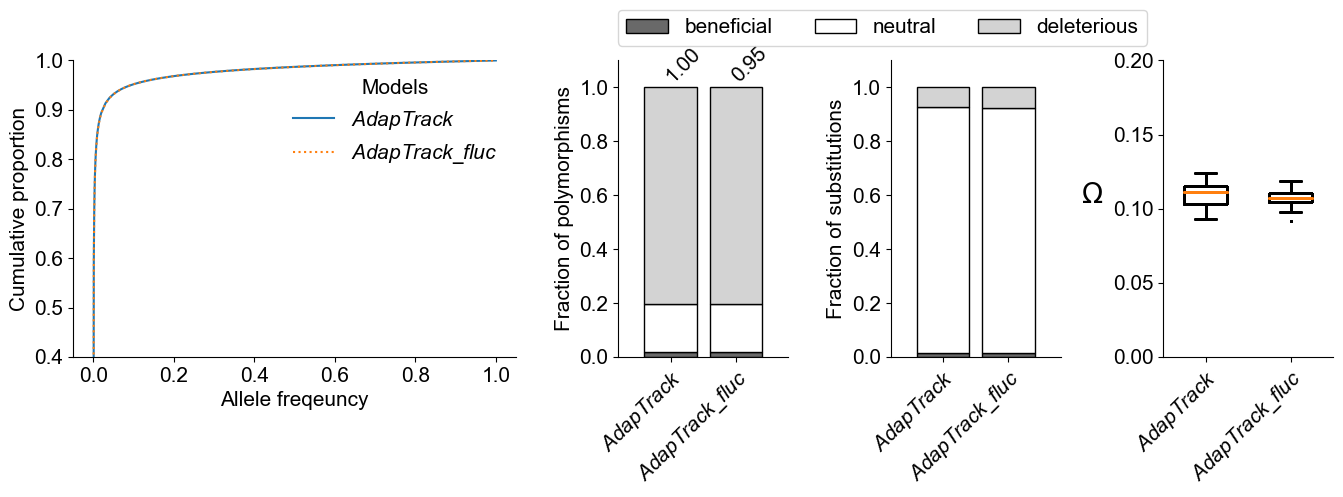

In [22]:
# Figure S3a-d
# Consider fluctuation of population size

version_list = ['AdapTrack','AdapTrack_pop_fluc']

line_type_dict = {
    'AdapTrack':'-',
    'AdapTrack_pop_fluc':':',
    'AdapTrack_quasineu':'-',
    'AdapTrack_general_fluc':':',
    'Adaptive':'-',
    'AdapTrack_asexual': '-',
    'Adaptive_asexual': '-'
}
color_list = ['C0','C1','C2','C3','C4']

# Set up figure structure
fig = plt.figure(constrained_layout=False, facecolor='w',figsize=[18,5*0.77])
gs = fig.add_gridspec(nrows=1, ncols=5, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.6,)
ax1 = fig.add_subplot(gs[0, 0:2],)
ax2 = fig.add_subplot(gs[0, 2])
ax3= fig.add_subplot(gs[0, 3])
ax4= fig.add_subplot(gs[0, 4],)
mut_type_list = ['beneficial','neutral','deleterious']
type_list = ['$\it{AdapTrack}$','$\it{AdapTrack\_fluc}$']

# Draw AF spectra
x_list = np.concatenate((np.linspace(0,0.02,21), np.linspace(0.03,1,98)))
for k,version in enumerate(version_list):
    if 'asexual' in version:
        ax1.plot(x_list[0:69],[0]+spectrum_final_dict[version][0:68].tolist(),
                 ls=line_type_dict[version],label=type_list[k],color=color_list[k])
    else:
        ax1.plot(x_list,[0]+spectrum_final_dict[version][0:].tolist(),
                 ls=line_type_dict[version],label=type_list[k],color=color_list[k])
ax1.legend(title='Models',framealpha=0)
ax1.set_xlabel('Allele freqeuncy',fontsize=15)
ax1.set_ylabel('Cumulative proportion',fontsize=15)
ax1.set_ylim(0.4,1)
   
# Draw bar plot for polymorphisms and substitutions; add relative ratio to the reference model (AdapTrack).
for idx,i in enumerate([33, 36]):
    # correspond to 'AdapTrack','AdapTrack_pop_fluc'
    for j,mut_type in enumerate(mut_type_list):
        meanORinst = 'inst'
        ax2.bar(
            idx, plt_df.loc[i,f'{mut_type}_{meanORinst}_P'],
            bottom=plt_df.loc[i,[f'{mut_type_list[jj]}_{meanORinst}_P' for jj in range(j)]].sum(),
            color=color_list2[j], label= mut_type_list[j] if idx == 0 else None
        )
        meanORinst = 'mean'
        ax3.bar(
            idx, plt_df.loc[i,f'{mut_type}_{meanORinst}_S'],
            bottom=plt_df.loc[i,[f'{mut_type_list[jj]}_{meanORinst}_S' for jj in range(j)]].sum(),
            color=color_list2[j]
        )

    # Calculate relative ratio to the reference model (AdapTrack)
    meanORinst = 'inst'
    ratio_P = summary_df.loc[i,[f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()/ \
            summary_df.loc[33,[f'{mut_type}_{meanORinst}_P' for mut_type in mut_type_list]].sum()
    ax2.text(
        x=idx+0.2,y=1.02,ha='center',
        s=f'{ratio_P:.2f}',rotation=45
    )

# Formatting
ax2.set_xticks(range(len(version_list)))
ax2.set_xticklabels(
    type_list, rotation = 45,
    ha='right', rotation_mode='anchor')
ax2.set_ylabel('Fraction of polymorphisms')
ax2.legend(loc=[0,1.05], ncol=3)
ax2.set_xlim(-0.8,1.8)
ax2.set_ylim(0,1.1)

ax3.set_xticks(range(len(version_list)))
ax3.set_xticklabels(
    type_list, rotation = 45,
    ha='right', rotation_mode='anchor')
ax3.set_ylabel('Fraction of substitutions')
ax3.set_xlim(-0.8,1.8)
ax3.set_ylim(0,1.1)

# Draw boxplots for dN/d_neutral
for rep in range(1,31):
    ax4.boxplot(
        plt_df.loc[[33, 36], [f'dNdneutral_{rep}' for rep in range(1,31)]].to_numpy().T,
        widths=0.5,
        flierprops = flierprops
    )

# Formatting
ax4.set_xticks(range(1, 1+len(version_list)))
ax4.set_ylim(0.0, 0.2)
ax4.set_xlim(0.5,2.5)
ax4.set_xticklabels(
    type_list, rotation = 45,
    ha='right', rotation_mode='anchor')

ax4.set_ylabel('$\mathit{Ω}$', labelpad=15, fontsize=20, rotation=0)


plt.tight_layout()
#plt.savefig(f'../Figures/FigS3a-d.pdf',bbox_inches='tight')

Text(0, 0.5, '$\\mathit{Ω}$')

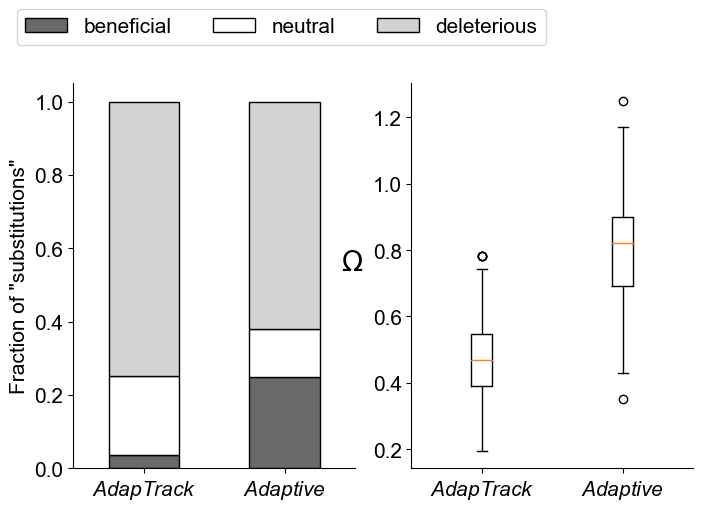

In [23]:
# Figure S6
# Compare Adaptive vs Adaptive tracking model in asexual population

N_mut_list_list = []

fig, axes = plt.subplots(1, 2, figsize=[8,5])
ax1, ax2 = axes

# Iterate over two asexual models
for idx, version in enumerate(['AdapTrack_asexual', 'Adaptive_asexual']):
    N_mut_list = []
    N_ben_sum, N_del_sum, N_neu_sum = [0, 0, 0]

    # Loop over 100 replicates
    for rep in range(1,101):
        df = pd.read_csv(f'./data/Simulation_log/1_ind_{version}/1_ind_{version}_{rep}.txt', header=None)
        # File format: single row [N_all, N_ben, N_del, N_neu]
        N_all, N_ben, N_del, N_neu = df.to_numpy()[0]
        N_mut_list.append(N_all)
        N_ben_sum += N_ben
        N_del_sum += N_del
        N_neu_sum += N_neu

    # Normalize replicate totals by neutral expectation:
    # 800 generations * μ * genome length * ploidy (2)
    N_mut_list_list.append(np.array(N_mut_list) / (800 * 1e-7 * 1.6e5 * 2))

    # Convert counts to fractions for bar chart
    N_sum = N_ben_sum + N_del_sum + N_neu_sum
    ax1.bar(idx, N_ben_sum/N_sum, color=color_list2[0], width=0.5,
            label='beneficial' if idx == 0 else None)
    ax1.bar(idx, N_neu_sum/N_sum, bottom=N_ben_sum/N_sum, color=color_list2[1], width=0.5,
            label='neutral' if idx == 0 else None)
    ax1.bar(idx, N_del_sum/N_sum, bottom=(N_ben_sum+N_neu_sum)/N_sum, color=color_list2[2], width=0.5,
            label='deleterious' if idx == 0 else None)

# Formatting
ax1.set_xlim(-0.5,1.5)
ax1.set_xticks(ticks=[0,1], labels=['$\it{AdapTrack}$','$\it{Adaptive}$'])
ax1.set_ylabel('Fraction of "substitutions"')
ax1.legend(ncol=3, loc=[-0.2,1.1])

ax2.boxplot(N_mut_list_list)
ax2.set_xticks(ticks=[1,2], labels=['$\it{AdapTrack}$','$\it{Adaptive}$'])
ax2.set_ylabel('$\mathit{Ω}$', labelpad=15, fontsize=20, rotation=0)

#plt.savefig(f'../Figures/FigS6.pdf',bbox_inches='tight')